In a regression problem a single best fit line might not be a straight line everytime. It is much better 

A simple way to do this is to add powers of each
feature as new features, then train a linear model on this extended set of features. This
technique is called Polynomial Regression.

In [35]:
import numpy as np

In [36]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

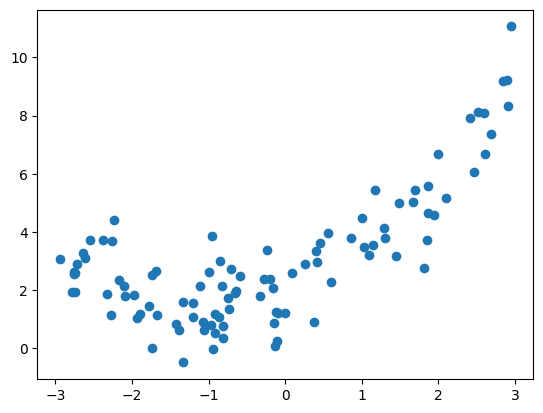

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

In [39]:
X_poly = poly.fit_transform(X)

In [40]:
X[0]

array([-1.69189288])

In [41]:
X_poly[0]

array([-1.69189288,  2.86250152])

X_poly now contains the original feature of X plus the square of this feature. Now you
can fit a LinearRegression model to this extended training data 

In [42]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_poly,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [43]:
regressor.intercept_, regressor.coef_

(array([1.93167135]), array([[0.97063457, 0.48018044]]))

Evaluating if the model is overfitting or underfitting using learning curves

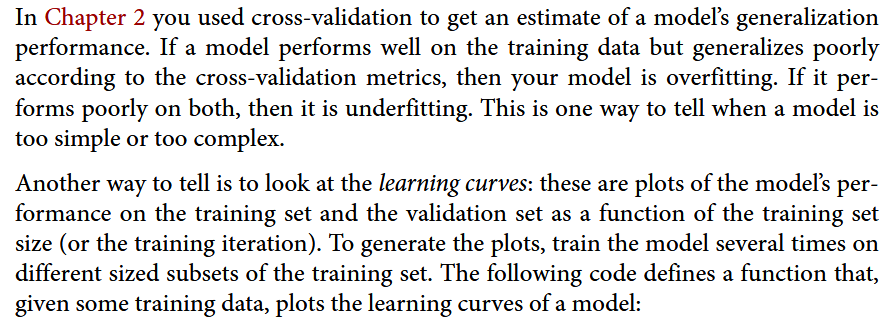

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
def plot_learning_curve(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    train_error,test_error = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_test_pred = model.predict(X_test)
        train_err= mean_squared_error(y_train[:m], y_train_pred)
        test_err = mean_squared_error(y_test, y_test_pred) 
        train_error.append(train_err)
        test_error.append(test_err)
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_error), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()

In [57]:
regressor = LinearRegression()

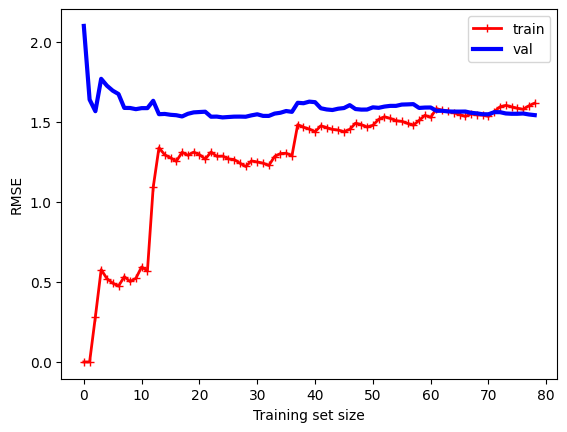

In [58]:
plot_learning_curve(regressor, X,y)

##### Increasing the number of degrees to boserve the graph

In [60]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("poly_features",  PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

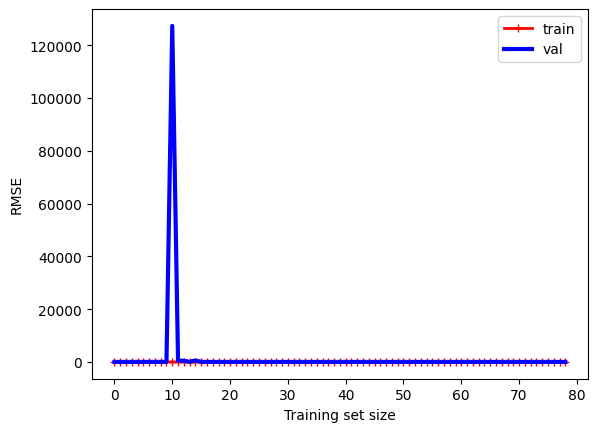

In [61]:
plot_learning_curve(pipe, X,y)